## Загрузка данных

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import matplotlib.pyplot as plt

filename = 'data/big.csv'
output_dir = 'data/output'

df = pd.read_csv(filename, delimiter = ',', index_col=(-2, -1), header=None, low_memory=False)
df.replace("#REF!", pd.NA, inplace=True)

df.head()

,,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,28
28,29,,,,,,,,,,,,,,,,,,,,,
1,0.005102,1,106.331,141.52499999999998,2,107.874,140.62100000000001,3,107.960,144.99099999999999,4,...,7,108.344,113.11150000000001,8,108.053,127.69200000000001,9,107.743,114.4055,1
2,0.010204,"4,33 мл ТН9",106.329,141.52499999999998,"4,23 мл ТН9",107.867,140.62100000000001,"4,5 мл ТН9",107.966,144.99099999999999,"4,42 мл ТН9",...,"4,41 ТН11",108.343,113.11150000000001,"4,31 ТН11",108.052,133.02449999999999,"4,19 ТН11",107.740,114.4055,2
3,0.015306,4.33,106.322,141.52499999999998,4.2300000000000004,107.870,140.62100000000001,4.5,107.967,144.99099999999999,4.42,...,NaN,108.340,113.11150000000001,NaN,108.054,133.02449999999999,NaN,107.746,114.4055,3
4,0.020408,4.33,106.328,141.52499999999998,4.2300000000000004,107.867,140.62100000000001,4.5,107.965,144.99099999999999,4.42,...,NaN,108.348,113.11150000000001,NaN,108.051,133.00900000000001,NaN,107.741,114.4055,4
5,0.025510,4.33,106.334,141.52499999999998,4.2300000000000004,107.872,140.62100000000001,4.5,107.964,144.99099999999999,4.42,...,NaN,108.347,113.11150000000001,NaN,108.051,133.00900000000001,NaN,107.735,114.4055,5


In [2]:
df.tail()

,,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,28
28,29,,,,,,,,,,,,,,,,,,,,,
1048572,5349.86,NaN,NaN,<NA>,NaN,NaN,<NA>,NaN,NaN,<NA>,NaN,...,NaN,NaN,<NA>,NaN,NaN,<NA>,NaN,NaN,<NA>,1048572
1048573,5349.86,NaN,NaN,<NA>,NaN,NaN,<NA>,NaN,NaN,<NA>,NaN,...,NaN,NaN,<NA>,NaN,NaN,<NA>,NaN,NaN,<NA>,1048573
1048574,5349.87,NaN,NaN,<NA>,NaN,NaN,<NA>,NaN,NaN,<NA>,NaN,...,NaN,NaN,<NA>,NaN,NaN,<NA>,NaN,NaN,<NA>,1048574
1048575,5349.87,NaN,NaN,<NA>,NaN,NaN,<NA>,NaN,NaN,<NA>,NaN,...,NaN,NaN,<NA>,NaN,NaN,<NA>,NaN,NaN,<NA>,1048575
1048576,5349.88,NaN,NaN,<NA>,NaN,NaN,<NA>,NaN,NaN,<NA>,NaN,...,NaN,NaN,<NA>,NaN,NaN,<NA>,NaN,NaN,<NA>,1048576


## Предподготовка данных

Переименование столбцов так, чтобы название каждого столбца соответствовало номиналу.

In [3]:
def name_columns_by_nominal(pd_df):
    curr_nominal = ''
    column_counter = 0
    for column in pd_df.columns:
        try:
            first_cell = pd_df[column].iloc[1]
            if any(char.isalpha() for char in str(first_cell)):
                curr_nominal = first_cell
                pd_df.drop(column, axis=1, inplace=True)
                column_counter = 1
            else:
                pd_df = pd_df.rename(columns={column: f"{curr_nominal}_{column_counter}"})
                column_counter += 1
        except:
            pd_df = pd_df.rename(columns={column: f"{curr_nominal}_{column_counter}"})
            column_counter += 1
    return pd_df

df_renamed = name_columns_by_nominal(df)
# Если есть пропуски, интерполируем их по двум соседним значениям, на всякий случай.
# df = df.infer_objects().interpolate()
df_renamed.index.name = 'time'
df_renamed.head()

,,"4,33 мл ТН9_1","4,33 мл ТН9_2","4,23 мл ТН9_1","4,23 мл ТН9_2","4,5 мл ТН9_1","4,5 мл ТН9_2","4,42 мл ТН9_1","4,42 мл ТН9_2","4,6 мл ТН9_1","4,6 мл ТН9_2","4,5 мл ТН11_1","4,5 мл ТН11_2","4,41 ТН11_1","4,41 ТН11_2","4,31 ТН11_1","4,31 ТН11_2","4,19 ТН11_1","4,19 ТН11_2","4,19 ТН11_3"
28,29,,,,,,,,,,,,,,,,,,,
1,0.005102,106.331,141.52499999999998,107.874,140.62100000000001,107.960,144.99099999999999,108.030,144.39349999999999,110.098,147.26650000000001,108.341,138.042,108.344,113.11150000000001,108.053,127.69200000000001,107.743,114.4055,1
2,0.010204,106.329,141.52499999999998,107.867,140.62100000000001,107.966,144.99099999999999,108.035,144.39349999999999,110.097,147.26650000000001,108.338,138.042,108.343,113.11150000000001,108.052,133.02449999999999,107.740,114.4055,2
3,0.015306,106.322,141.52499999999998,107.870,140.62100000000001,107.967,144.99099999999999,108.038,144.39349999999999,110.098,147.26650000000001,108.335,138.042,108.340,113.11150000000001,108.054,133.02449999999999,107.746,114.4055,3
4,0.020408,106.328,141.52499999999998,107.867,140.62100000000001,107.965,144.99099999999999,108.035,144.39349999999999,110.108,147.26650000000001,108.337,138.042,108.348,113.11150000000001,108.051,133.00900000000001,107.741,114.4055,4
5,0.025510,106.334,141.52499999999998,107.872,140.62100000000001,107.964,144.99099999999999,108.026,144.39349999999999,110.100,147.26650000000001,108.337,138.042,108.347,113.11150000000001,108.051,133.00900000000001,107.735,114.4055,5


In [4]:
df_renamed.tail()

,,"4,33 мл ТН9_1","4,33 мл ТН9_2","4,23 мл ТН9_1","4,23 мл ТН9_2","4,5 мл ТН9_1","4,5 мл ТН9_2","4,42 мл ТН9_1","4,42 мл ТН9_2","4,6 мл ТН9_1","4,6 мл ТН9_2","4,5 мл ТН11_1","4,5 мл ТН11_2","4,41 ТН11_1","4,41 ТН11_2","4,31 ТН11_1","4,31 ТН11_2","4,19 ТН11_1","4,19 ТН11_2","4,19 ТН11_3"
28,29,,,,,,,,,,,,,,,,,,,
1048572,5349.86,NaN,<NA>,NaN,<NA>,NaN,<NA>,NaN,<NA>,NaN,<NA>,NaN,<NA>,NaN,<NA>,NaN,<NA>,NaN,<NA>,1048572
1048573,5349.86,NaN,<NA>,NaN,<NA>,NaN,<NA>,NaN,<NA>,NaN,<NA>,NaN,<NA>,NaN,<NA>,NaN,<NA>,NaN,<NA>,1048573
1048574,5349.87,NaN,<NA>,NaN,<NA>,NaN,<NA>,NaN,<NA>,NaN,<NA>,NaN,<NA>,NaN,<NA>,NaN,<NA>,NaN,<NA>,1048574
1048575,5349.87,NaN,<NA>,NaN,<NA>,NaN,<NA>,NaN,<NA>,NaN,<NA>,NaN,<NA>,NaN,<NA>,NaN,<NA>,NaN,<NA>,1048575
1048576,5349.88,NaN,<NA>,NaN,<NA>,NaN,<NA>,NaN,<NA>,NaN,<NA>,NaN,<NA>,NaN,<NA>,NaN,<NA>,NaN,<NA>,1048576


### Графики

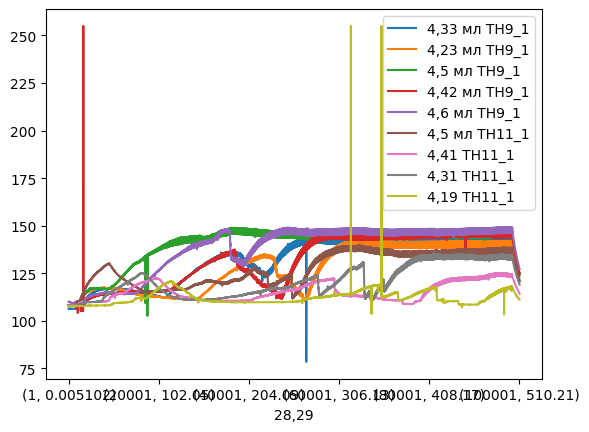

In [5]:
df_renamed.drop(df_renamed.columns[-1], axis=1, inplace=True)
df_measurements = df_renamed.dropna()
df_measurements.plot()
plt.show()

## Удаление выбросов

In [6]:
df_measurements.head()

,,"4,33 мл ТН9_1","4,33 мл ТН9_2","4,23 мл ТН9_1","4,23 мл ТН9_2","4,5 мл ТН9_1","4,5 мл ТН9_2","4,42 мл ТН9_1","4,42 мл ТН9_2","4,6 мл ТН9_1","4,6 мл ТН9_2","4,5 мл ТН11_1","4,5 мл ТН11_2","4,41 ТН11_1","4,41 ТН11_2","4,31 ТН11_1","4,31 ТН11_2","4,19 ТН11_1","4,19 ТН11_2"
28,29,,,,,,,,,,,,,,,,,,
1,0.005102,106.331,141.52499999999998,107.874,140.62100000000001,107.960,144.99099999999999,108.030,144.39349999999999,110.098,147.26650000000001,108.341,138.042,108.344,113.11150000000001,108.053,127.69200000000001,107.743,114.4055
2,0.010204,106.329,141.52499999999998,107.867,140.62100000000001,107.966,144.99099999999999,108.035,144.39349999999999,110.097,147.26650000000001,108.338,138.042,108.343,113.11150000000001,108.052,133.02449999999999,107.740,114.4055
3,0.015306,106.322,141.52499999999998,107.870,140.62100000000001,107.967,144.99099999999999,108.038,144.39349999999999,110.098,147.26650000000001,108.335,138.042,108.340,113.11150000000001,108.054,133.02449999999999,107.746,114.4055
4,0.020408,106.328,141.52499999999998,107.867,140.62100000000001,107.965,144.99099999999999,108.035,144.39349999999999,110.108,147.26650000000001,108.337,138.042,108.348,113.11150000000001,108.051,133.00900000000001,107.741,114.4055
5,0.025510,106.334,141.52499999999998,107.872,140.62100000000001,107.964,144.99099999999999,108.026,144.39349999999999,110.100,147.26650000000001,108.337,138.042,108.347,113.11150000000001,108.051,133.00900000000001,107.735,114.4055


In [7]:
df_measurements.tail()

,,"4,33 мл ТН9_1","4,33 мл ТН9_2","4,23 мл ТН9_1","4,23 мл ТН9_2","4,5 мл ТН9_1","4,5 мл ТН9_2","4,42 мл ТН9_1","4,42 мл ТН9_2","4,6 мл ТН9_1","4,6 мл ТН9_2","4,5 мл ТН11_1","4,5 мл ТН11_2","4,41 ТН11_1","4,41 ТН11_2","4,31 ТН11_1","4,31 ТН11_2","4,19 ТН11_1","4,19 ТН11_2"
28,29,,,,,,,,,,,,,,,,,,
100070,510.56,121.478,0,120.957,0,125.162,0,124.502,0,127.260,0,120.731,0,114.263,0,119.078,0,111.206,0
100071,510.57,121.452,0,120.947,0,125.152,0,124.501,0,127.251,0,120.721,0,114.275,0,119.075,0,111.195,0
100072,510.57,121.447,0,120.931,0,125.151,0,124.487,0,127.251,0,120.718,0,114.259,0,119.073,0,111.198,0
100073,510.58,121.450,0,120.936,0,125.144,0,124.487,0,127.244,0,120.716,0,114.258,0,119.066,0,111.201,0
100074,510.58,121.437,0,120.916,0,125.132,0,124.473,0,127.226,0,120.700,0,114.251,0,119.050,0,111.202,0


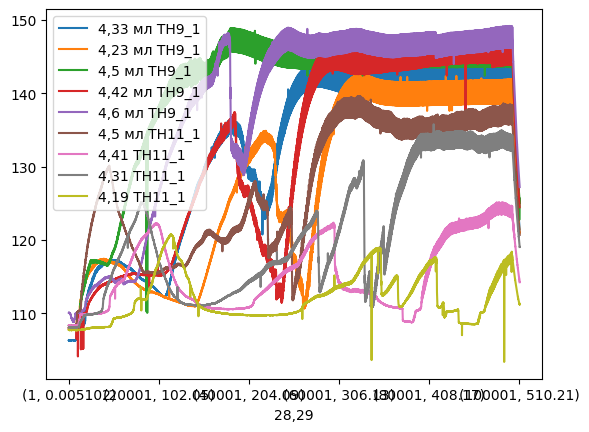

In [8]:
from scipy import stats
import numpy as np

def remove_outliers(df):
    df = df.drop_duplicates()
    for col in df.columns:
        if pd.api.types.is_numeric_dtype(df[col]):
            df[col] = df[col][(np.abs(stats.zscore(df[col])) < 3)]
    return df

df_actual = remove_outliers(df_measurements)
df_actual.plot()
plt.show()

In [9]:
time_index = df_actual.index.get_level_values(1)[1::2]
freq = df_actual.shape[0] / (time_index.max() - time_index.min())

In [10]:
print('Частота дискретизации', freq)

196.00454391156347


In [11]:
from scipy.signal import lfilter, lfilter_zi

def moving_average_filter(df, sampling_rate=200, window_size=5):
    # Coefficients for the moving average filter
    b = np.ones(window_size) / window_size
    a = 1
    
    filtered_df = pd.DataFrame(index=df.index)
    
    for column in df.columns:
        if pd.api.types.is_numeric_dtype(df[column]):
            zi = lfilter_zi(b, a) * df[column].iloc[0]
            filtered_column, _ = lfilter(b, a, df[column], zi=zi)
            filtered_df[column] = filtered_column
    
    return filtered_df

## Плавающее среднее

<Axes: xlabel='28,29'>

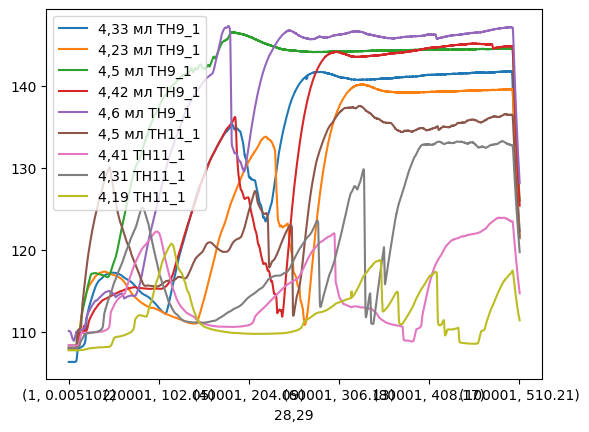

In [17]:
df_measurements_filtered = moving_average_filter(df_measurements, freq, int(freq))
df_measurements_filtered.plot()

In [21]:
df_measurements_filtered.reset_index(drop=True, inplace=True)

In [23]:
def find_local_extrema(df):
    from scipy.signal import argrelextrema
    
    extrema_df = pd.DataFrame(index=df.index)
    
    for column in df.columns:
        if pd.api.types.is_numeric_dtype(df[column]):
            local_max_idx = argrelextrema(df[column].values, np.greater)[0]
            local_min_idx = argrelextrema(df[column].values, np.less)[0]
            
            extrema_series = pd.Series(index=df.index)
            extrema_series.iloc[local_max_idx] = df[column].iloc[local_max_idx]
            extrema_series.iloc[local_min_idx] = df[column].iloc[local_min_idx]
            extrema_df[(column, 'Max')] = pd.Series(extrema_series.iloc[local_max_idx], index=local_max_idx)
            extrema_df[(column, 'Min')] = pd.Series(extrema_series.iloc[local_min_idx], index=local_min_idx)
            
    extrema_df = extrema_df.dropna(how='all')
    extrema_df.columns = pd.MultiIndex.from_tuples(extrema_df.columns, names=['Column', 'Extrema'])
    
    return extrema_df

df_measurements_extrema = find_local_extrema(df_measurements_filtered)

Точки - это локальные экстремумы

<Axes: >

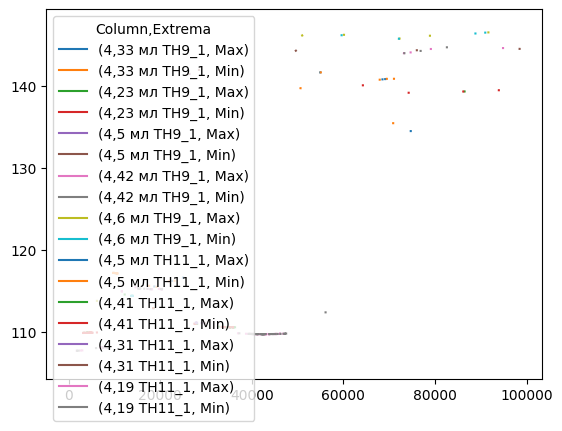

In [25]:
df_measurements_extrema.plot()